In [2]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

9436
/media/work/docs/codes/QuCF/scripts-py


In [2]:
import pylib.mix as mix
from matplotlib import ticker
import time

path_ = 
colors_ = ['b', 'r', 'g', 'gray', 'orange']

# cmap = 'seismic'
# cmap = 'bwr'
# cmap = 'jet'
# cmap = 'coolwarm'
cmap_one_sign_ = 'YlGn'
cmap_two_signs_= 'coolwarm'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

Reading the file ../results/LKW-1D-results/test_der.hdf5...


<IPython.core.display.Javascript object>


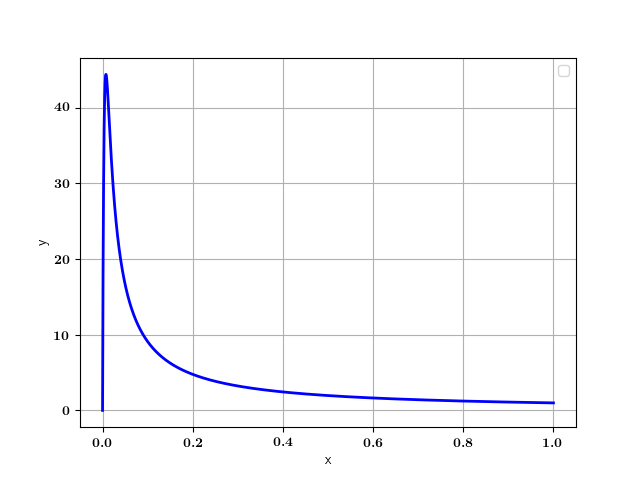

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


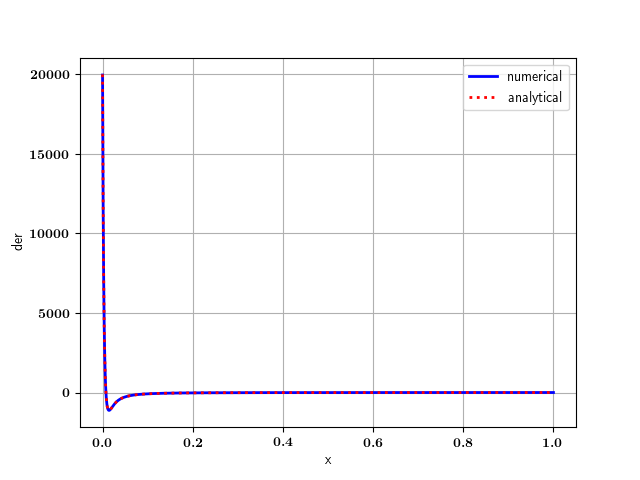

In [14]:
fname = "../results/LKW-1D-results/test_der.hdf5"
print(f"Reading the file {fname}...")
with h5py.File(fname, "r") as f:
    # ---
    bg           = f["basic"]
    date_sim = bg["date-of-simulation"][()].decode("utf-8")
    # ---
    bg = f["results"]
    x = np.array(bg["x"])
    Nx = len(x)
    y = np.array(bg["y"])
    der_numerical  = np.array(bg["der-numerical"])
    der_analytical = np.array(bg["der-analytical"])
    
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='b', linewidth = 2, linestyle='-')
plt.xlabel('x')
plt.ylabel("y")
ax.legend()
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, der_numerical, color='b', linewidth = 2, linestyle='-', label="numerical")
ax.plot(x, der_analytical, color='r', linewidth = 2, linestyle=':', label="analytical")
plt.xlabel('x')
plt.ylabel("der")
ax.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


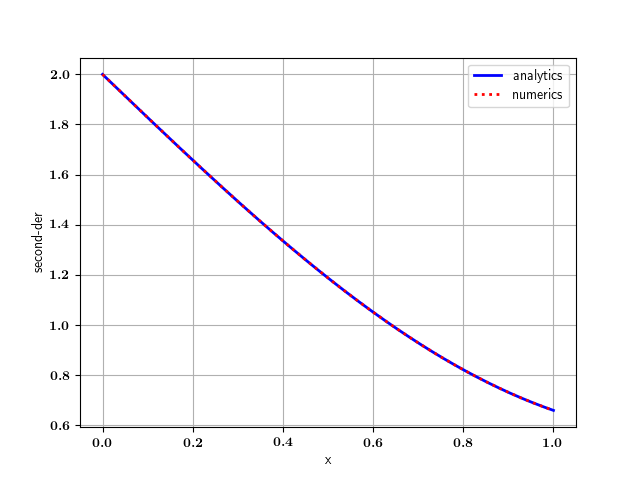

In [11]:
# --- Test second derivative ---
def second_derivative(x,y):
    Nx = len(x)
    ddy = np.zeros(Nx)
    h = np.diff(x)[0]
    eta = 1./(h*h)
    
#     ddy[0]    = eta * (y[0] - 2.*y[1] + y[2])
    ddy[0]    = eta * (2.*y[0] - 5.*y[1] + 4.*y[2] - y[3])
    
#     ddy[Nx-1] = eta * (y[Nx-3] - 2.*y[Nx-2] + y[Nx-1])
    ddy[Nx-1] = eta * (2.*y[Nx-1] - 5.*y[Nx-2] + 4.*y[Nx-3] - y[Nx-4])
    
    for i in range(1, Nx-1):
        ddy[i] = eta * (y[i-1] - 2*y[i] + y[i+1])
        
    return ddy
    
    
x = np.linspace(0,1,201)

# y, ddy_a = x*x, 2. * np.ones(len(x))
# y, ddy_a = x*x*x, 6. * x
y, ddy_a = np.sin(1.2*x) + x*x, - 1.44 * np.sin(1.2*x) + 2

ddy = second_derivative(x,y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, ddy_a, color='b', linewidth = 2, linestyle='-', label = 'analytics')
ax.plot(x, ddy, color='r', linewidth = 2, linestyle=':', label = 'numerics')
plt.xlabel('x')
plt.ylabel("second-der")
ax.legend()
plt.grid(True)
plt.show()


del x, y, ddy_a, ddy